##CourseWork 5: Customer Segmentation with Clustering
* Objective:  Use unsupervised machine learning to identify distinct groups of customers within a mall's dataset. By segmenting customers based on multiple dimensions (income, age, spending habits), we can provide rich, actionable insights to the marketing team for highly targeted campaigns.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.cluster.hierarchy as sch

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Set plot style
sns.set_style('whitegrid')

In [2]:
# Load the dataset from the user-provided file
!git clone "https://github.com/GeeksforgeeksDS/21-Days-21-Projects-Dataset"
df = pd.read_csv('/content/21-Days-21-Projects-Dataset/Datasets/Mall_Customers.csv')

print("Dataset loaded successfully.")
print(f"Data shape: {df.shape}")
df.head()

Cloning into '21-Days-21-Projects-Dataset'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 22 (delta 3), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (22/22), 1.40 MiB | 4.79 MiB/s, done.
Resolving deltas: 100% (3/3), done.
Dataset loaded successfully.
Data shape: (200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
# Drop the CustomerID as it's just an identifier and not useful for clustering
df.drop('CustomerID', axis=1, inplace=True)

In [7]:
#missing values - any?

In [8]:
df.isnull().sum()

,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [10]:
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
              Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000          200.000000              200.000000
mean    38.850000           60.560000               50.200000
std     13.969007           26.264721               25.823522
min     18.000000           15.000000                1.000000
25%     28.750000           41.500000               34.750000
50%     36.000000           61.500000               50.000000
75%     49.000000           78.000000               73.000000
max     70.000000          137.000000               99.000000


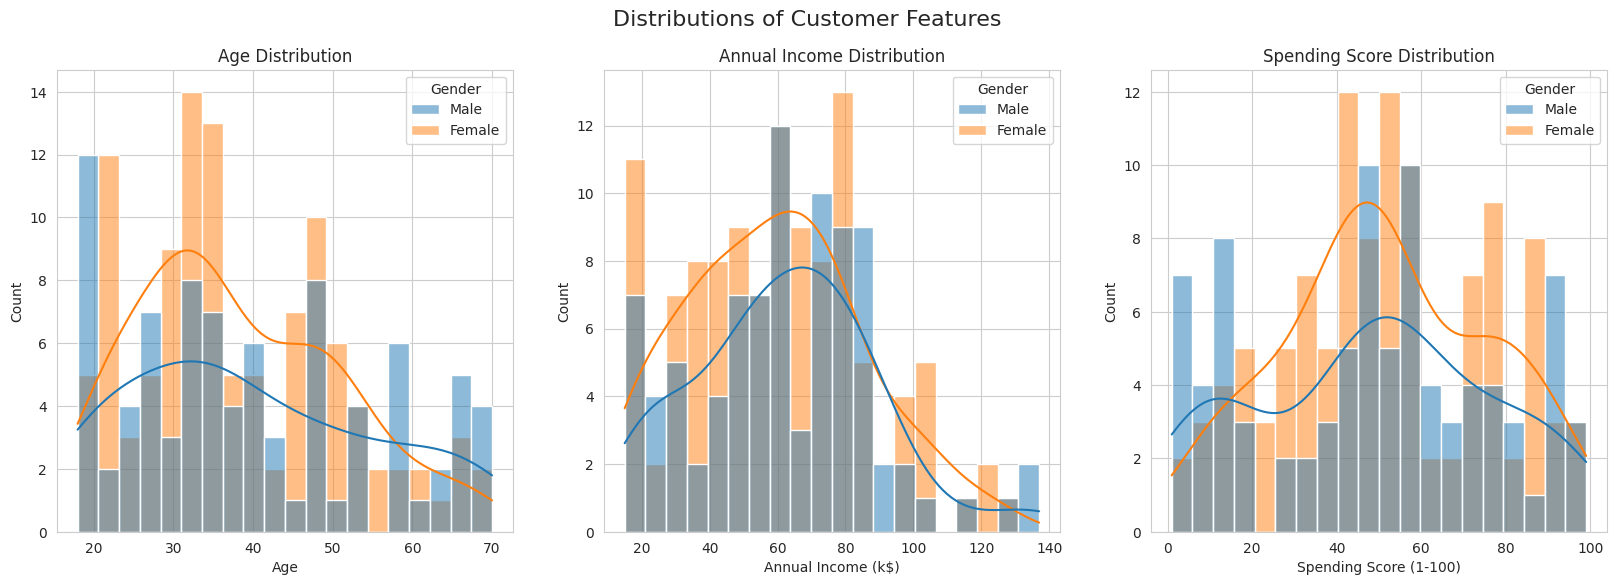

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Distributions of Customer Features', fontsize=16)

sns.histplot(ax=axes[0], data=df, x='Age', kde=True, bins=20, hue='Gender').set_title('Age Distribution')
sns.histplot(ax=axes[1], data=df, x='Annual Income (k$)', kde=True, bins=20, hue='Gender').set_title('Annual Income Distribution')
sns.histplot(ax=axes[2], data=df, x='Spending Score (1-100)', kde=True, bins=20, hue='Gender').set_title('Spending Score Distribution')

plt.show()

/tmp/ipython-input-2486798776.py:21: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0,2].boxplot([df[income_col], df[spending_col]], labels=['Income', 'Spending'])


Text(1172.4281045751634, 0.5, 'Average Spending Score')

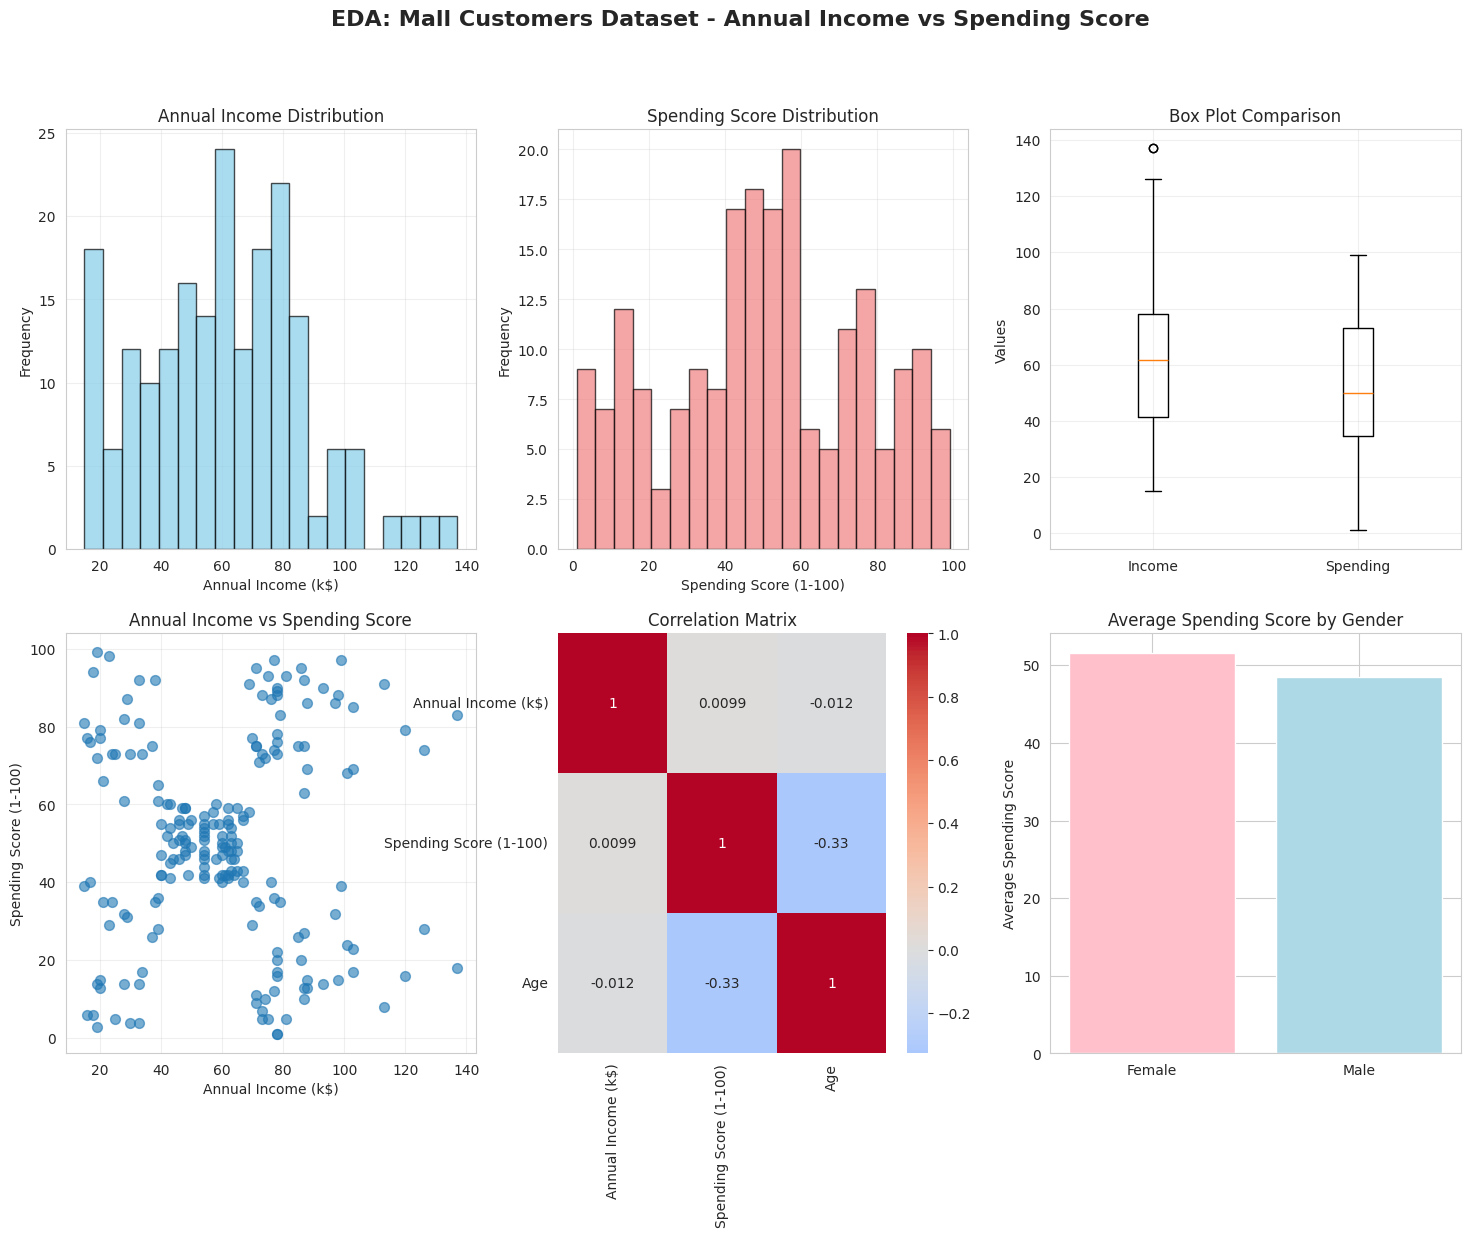

In [19]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('EDA: Mall Customers Dataset - Annual Income vs Spending Score', fontsize=16, fontweight='bold')

income_col = 'Annual Income (k$)'
spending_col = 'Spending Score (1-100)'
# Annual Income distribution
axes[0,0].hist(df['Annual Income (k$)'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('Annual Income Distribution')
axes[0,0].set_xlabel('Annual Income (k$)')
axes[0,0].set_ylabel('Frequency')
axes[0,0].grid(True, alpha=0.3)

# Spending Score distribution
axes[0,1].hist(df['Spending Score (1-100)'], bins=20, alpha=0.7, color='lightcoral', edgecolor='black')
axes[0,1].set_title('Spending Score Distribution')
axes[0,1].set_xlabel('Spending Score (1-100)')
axes[0,1].set_ylabel('Frequency')
axes[0,1].grid(True, alpha=0.3)

# Box plots
axes[0,2].boxplot([df[income_col], df[spending_col]], labels=['Income', 'Spending'])
axes[0,2].set_title('Box Plot Comparison')
axes[0,2].set_ylabel('Values')
axes[0,2].grid(True, alpha=0.3)

# Scatter plot - Main focus
scatter = axes[1,0].scatter(df[income_col], df[spending_col], alpha=0.6, s=50)
axes[1,0].set_title('Annual Income vs Spending Score')
axes[1,0].set_xlabel('Annual Income (k$)')
axes[1,0].set_ylabel('Spending Score (1-100)')
axes[1,0].grid(True, alpha=0.3)

corr_data = df[[income_col, spending_col, 'Age']].corr()

sns.heatmap(corr_data, annot=True, cmap='coolwarm', center=0, ax=axes[1,1])
axes[1,1].set_title('Correlation Matrix')

gender_spending = df.groupby('Gender')[spending_col].mean()
axes[1,2].bar(gender_spending.index, gender_spending.values, color=['pink', 'lightblue'])
axes[1,2].set_title('Average Spending Score by Gender')
axes[1,2].set_ylabel('Average Spending Score')


# Insights

* Income Distribution Shows Clear Segmentation - pattern with peaks around 50k$ - 80k$, suggesting natural customer segments exist in the dataset.

* Spending Score Distribution is Relatively Uniform

* Weak Correlation Between Income and Spending

* Income vs Spending Score scatter plot reveals distinct clusters of customers, with visible groupings in different quadrants.

* The average spending scores by gender are nearly identical (around 50 for both Female and Male),



In [24]:
# Correlation Analysis between income and spending

correlation = df[income_col].corr(df[spending_col])

In [25]:
print(f"\nCorrelation between Annual Income and Spending Score: {correlation:.3f}")


Correlation between Annual Income and Spending Score: 0.010


#The Elbow Method
* How do we choose the best number of clusters (k) for our K-Means model? The Elbow Method is a common technique.

* It works by calculating the Within-Cluster Sum of Squares (WCSS) for different values of k (typically from 1 to 10). WCSS is the sum of the squared distances between each point and the centroid of the cluster it belongs to. A lower WCSS means the points are closer to their cluster centroids, indicating tighter clusters.

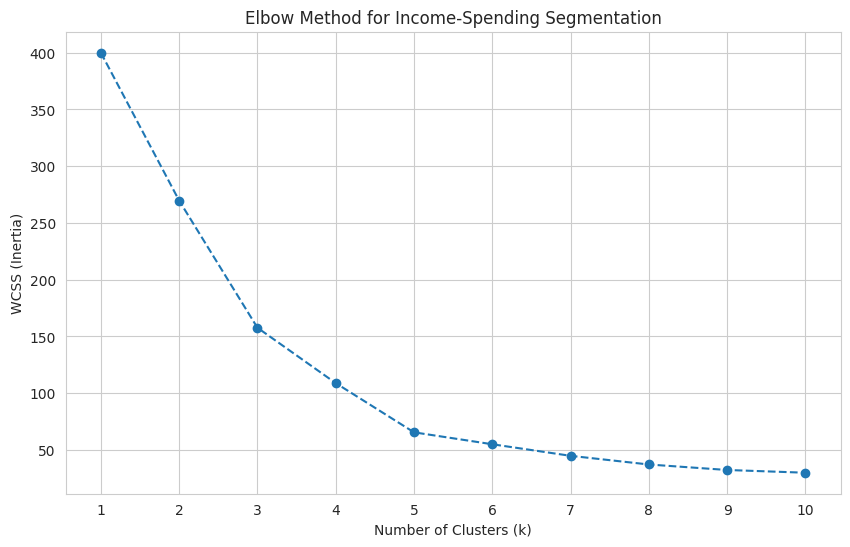

In [28]:
# 1. Select and scale the features
X1 = df[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler1 = StandardScaler()
X1_scaled = scaler1.fit_transform(X1)

# 2. Implement the Elbow Method
wcss1 = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X1_scaled)
    wcss1.append(kmeans.inertia_)

# 3. Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss1, marker='o', linestyle='--')
plt.title('Elbow Method for Income-Spending Segmentation')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.xticks(range(1, 11))
plt.show()

In [29]:
# Build and fit the final model
kmeans1 = KMeans(n_clusters=5, init='k-means++', random_state=42, n_init=10)
df['Income_Cluster'] = kmeans1.fit_predict(X1_scaled)

In [31]:
df['Income_Cluster']

,Income_Cluster
0,4
1,2
2,4
3,2
4,4
...,...
195,1
196,3
197,1
198,3


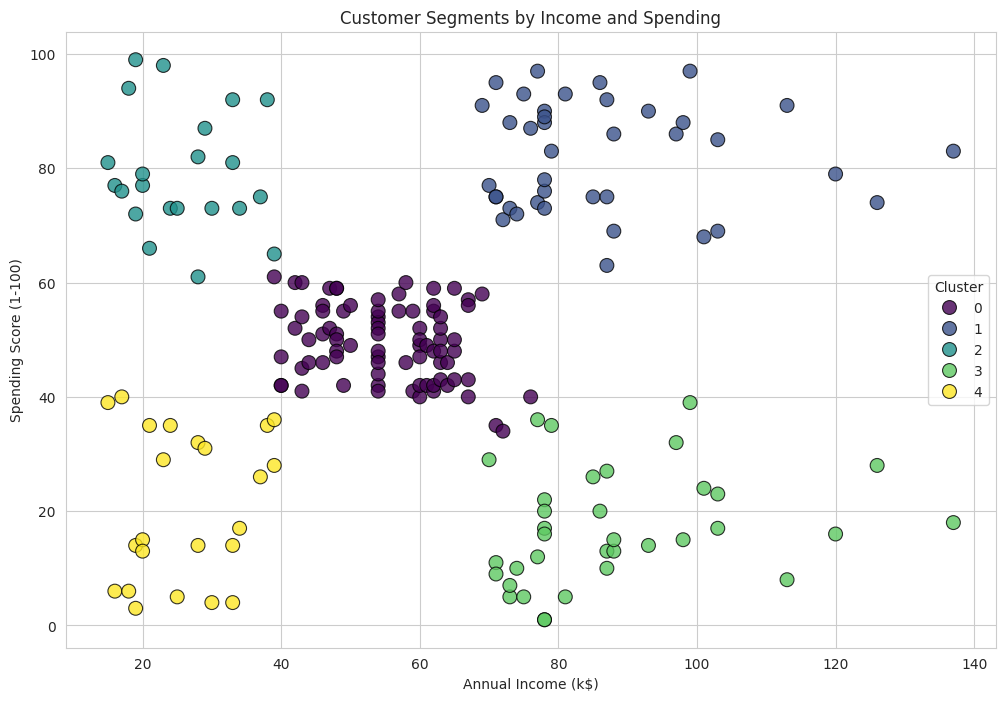

In [33]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='Income_Cluster', palette='viridis', s=100, alpha=0.8, edgecolor='black')
plt.title('Customer Segments by Income and Spending')
plt.legend(title='Cluster')
plt.show()

In [34]:
# Quantitative Persona Analysis
cluster_profiles1 = df.groupby('Income_Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().round(2)
cluster_profiles1['Size'] = df['Income_Cluster'].value_counts()
print("--- Income-Based Cluster Profiles ---")
cluster_profiles1

--- Income-Based Cluster Profiles ---


,Age,Annual Income (k$),Spending Score (1-100),Size
Income_Cluster,,,,
0,42.72,55.30,49.52,81
1,32.69,86.54,82.13,39
2,25.27,25.73,79.36,22
3,41.11,88.20,17.11,35
4,45.22,26.30,20.91,23


# Insights ::

*  Cluster 0 (Careful High-Earners): High income (88k) but low spending (17).

Cautious, value-driven buyers.
* Cluster 1 (Standard): Average income (55k) and spending (50). This is the largest, core customer group.
* Cluster 2 (Budget Shoppers): Low income (26k) and low spending (21). Highly price-sensitive.
* Cluster 3 (Target - High Value): High income (87k) and high spending (82). The mall's prime target.
* Cluster 4 (Enthusiasts): Low income (26k) but high spending (79). Likely young, trend-focused shoppers.


In [35]:
#Segmentation Model 2 - Age & Spending Score

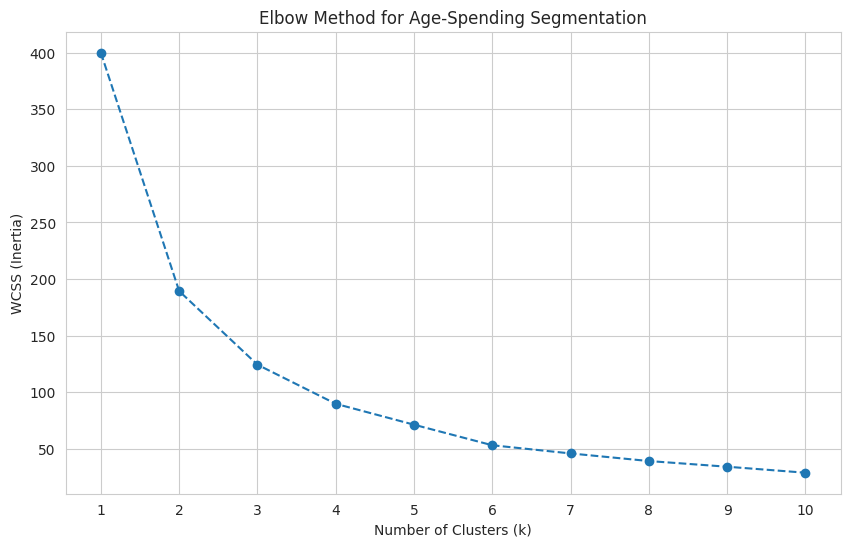

In [36]:
# 1. Select and scale the features
X2 = df[['Age', 'Spending Score (1-100)']]
scaler2 = StandardScaler()
X2_scaled = scaler2.fit_transform(X2)

# 2. Implement the Elbow Method
wcss2 = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X2_scaled)
    wcss2.append(kmeans.inertia_)

# 3. Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss2, marker='o', linestyle='--')
plt.title('Elbow Method for Age-Spending Segmentation')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.xticks(range(1, 11))
plt.show()

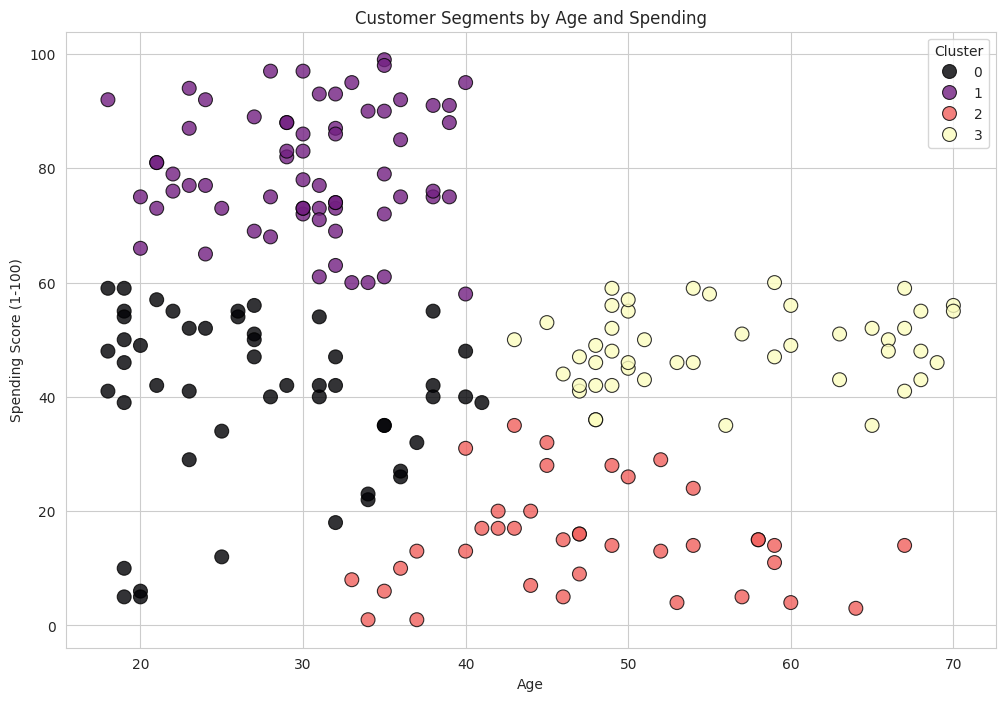

In [37]:
# Build and fit the final model for age segmentation
kmeans2 = KMeans(n_clusters=4, init='k-means++', random_state=42, n_init=10)
df['Age_Cluster'] = kmeans2.fit_predict(X2_scaled)

# Visualize the new clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)',
                hue='Age_Cluster', palette='magma', s=100, alpha=0.8, edgecolor='black')
plt.title('Customer Segments by Age and Spending')
plt.legend(title='Cluster')
plt.show()

In [38]:
## Dendrogram to ensure cluster formation

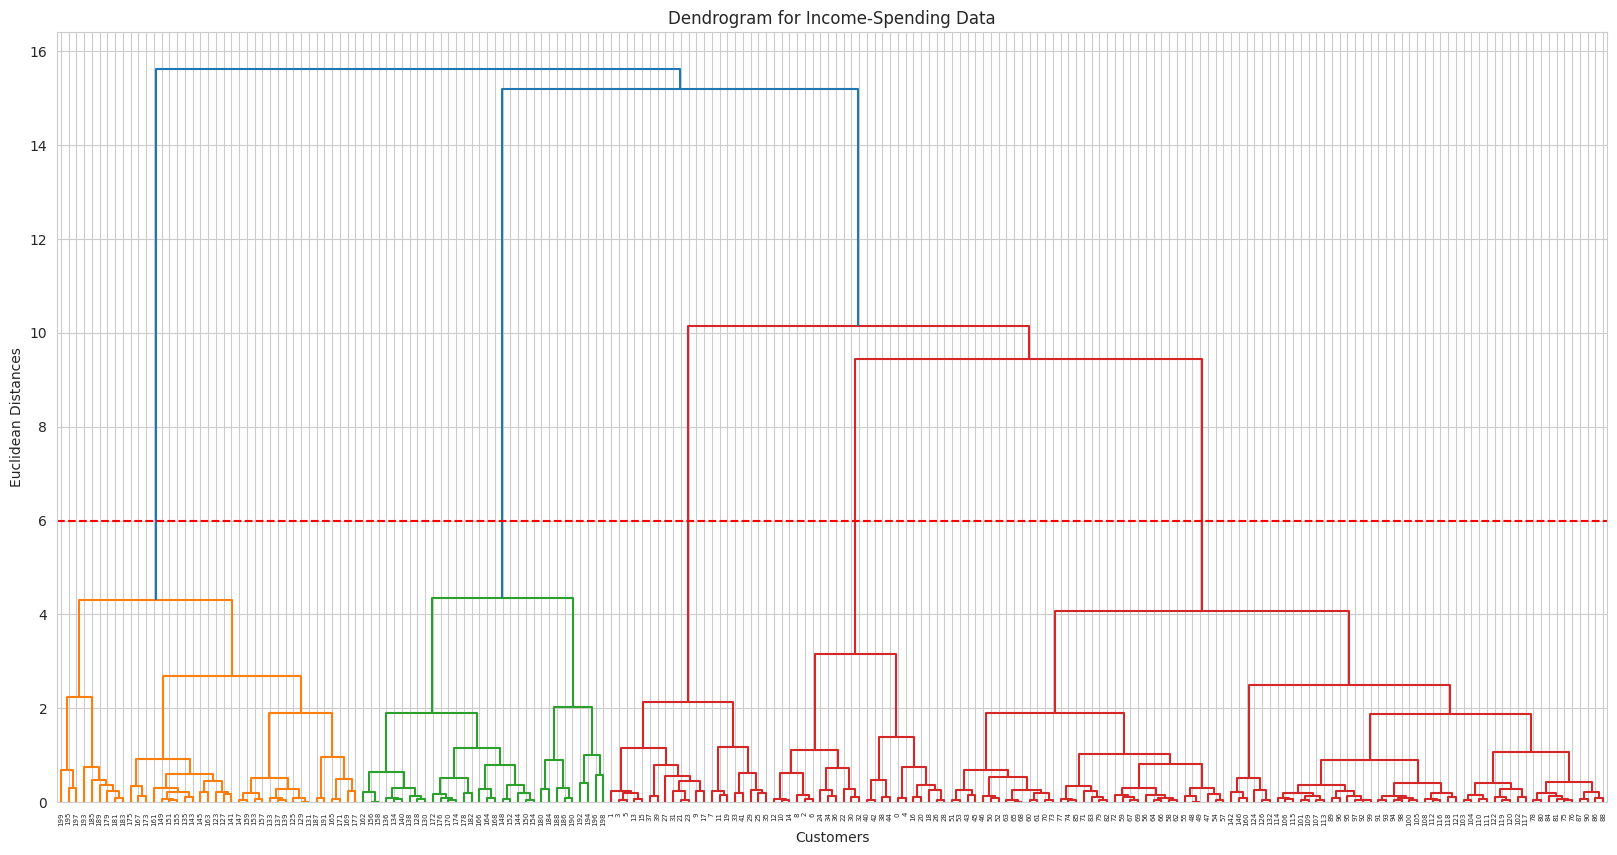

In [39]:
plt.figure(figsize=(20, 10))
dendrogram = sch.dendrogram(sch.linkage(X1_scaled, method='ward'))
plt.title('Dendrogram for Income-Spending Data')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.axhline(y=6, color='r', linestyle='--') # Example cut-off line
plt.show()

# Course Work :


1.  **Explore Gender vs. Spending Score:** Analyze the relationship between 'Gender' and 'Spending Score (1-100)' to see if gender plays a significant role in spending habits. Visualizations and summary statistics would be helpful here.


--- Gender vs. Spending Score Analysis ---

Summary Statistics of Spending Score by Gender:


,mean,median,std
Gender,,,
Female,51.53,50.0,24.11
Male,48.51,50.0,27.90


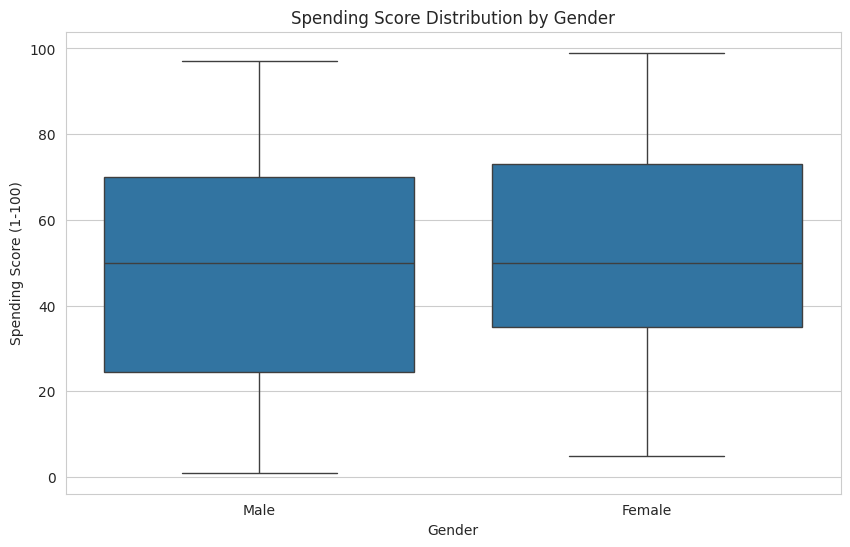

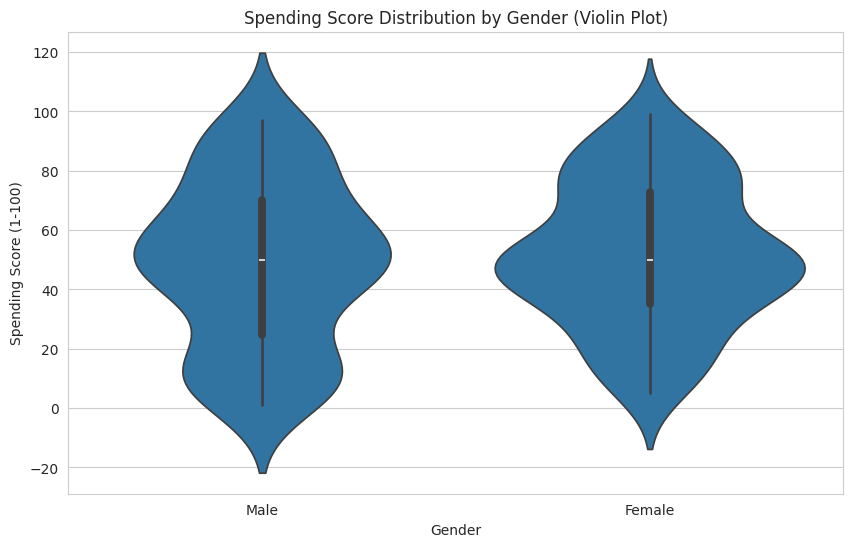

In [41]:
# Analyze Gender vs. Spending Score
print("\n--- Gender vs. Spending Score Analysis ---")

# Summary statistics by gender
gender_spending_summary = df.groupby('Gender')['Spending Score (1-100)'].agg(['mean', 'median', 'std']).round(2)
print("\nSummary Statistics of Spending Score by Gender:")
display(gender_spending_summary)

# Visualization of spending score distribution by gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=df)
plt.title('Spending Score Distribution by Gender')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x='Gender', y='Spending Score (1-100)', data=df)
plt.title('Spending Score Distribution by Gender (Violin Plot)')
plt.show()

# Insights

* Female distribution: Shows a broader, more uniform spread across the entire spending score range (1-100), suggesting diverse spending behaviors within the female segment. Female customers are more heterogeneous in their spending behavior, ranging from very low to very high spenders


* Male distribution: Shows a more concentrated, narrower distribution around the median, indicating more homogeneous spending patterns. Male customers show more predictable spending patterns, clustering around moderate spending levels


**CourseWork2 : Apply Feature Engineering for Clustering:** Create a new feature using existing data (Feature Engineering). Then, explore if clustering can be effectively performed using this newly engineered feature in combination with one or more existing features. Document the feature engineering process, the chosen features for clustering, the determination of the optimal number of clusters (e.g., using the Elbow Method), and the resulting cluster visualization and interpretation.


## Feature engineering




Creating new features 'Income_to_Spending_Ratio' and 'Age_x_Spending' based on existing columns, handling potential division by zero for the ratio.



In [50]:
# Create 'Income_to_Spending_Ratio', handling division by zero
# Add a small epsilon to the denominator to avoid division by zero
epsilon = 1e-6
df['Income_to_Spending_Ratio'] = df['Annual Income (k$)'] / (df['Spending Score (1-100)'] + epsilon)

# Replace infinite values that might occur
df['Income_to_Spending_Ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill potential NaNs
max_ratio = df['Income_to_Spending_Ratio'].max()
df['Income_to_Spending_Ratio'].fillna(max_ratio, inplace=True)
# Create 'Age_x_Spending' feature
df['Age_x_Spending'] = df['Age'] * df['Spending Score (1-100)']


display(df[['Income_to_Spending_Ratio', 'Age_x_Spending']].head())

/tmp/ipython-input-892817538.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income_to_Spending_Ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)
/tmp/ipython-input-892817538.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method

,Income_to_Spending_Ratio,Age_x_Spending
0,0.384615,741
1,0.185185,1701
2,2.666666,120
3,0.207792,1771
4,0.425000,1240


## Feature selection

Choose the relevant features for clustering, including the newly engineered feature and potentially other existing features.



Select the newly engineered features and an existing feature for clustering.



In [51]:
X3 = df[['Income_to_Spending_Ratio', 'Age', 'Annual Income (k$)']].values

## Data scaling

Scale the selected features to ensure that all features contribute equally to the clustering process.



Scale the selected features using StandardScaler to prepare them for clustering.



In [52]:
scaler3 = StandardScaler()
X3_scaled = scaler3.fit_transform(X3)


Implement the Elbow Method to find the optimal number of clusters for the scaled data.



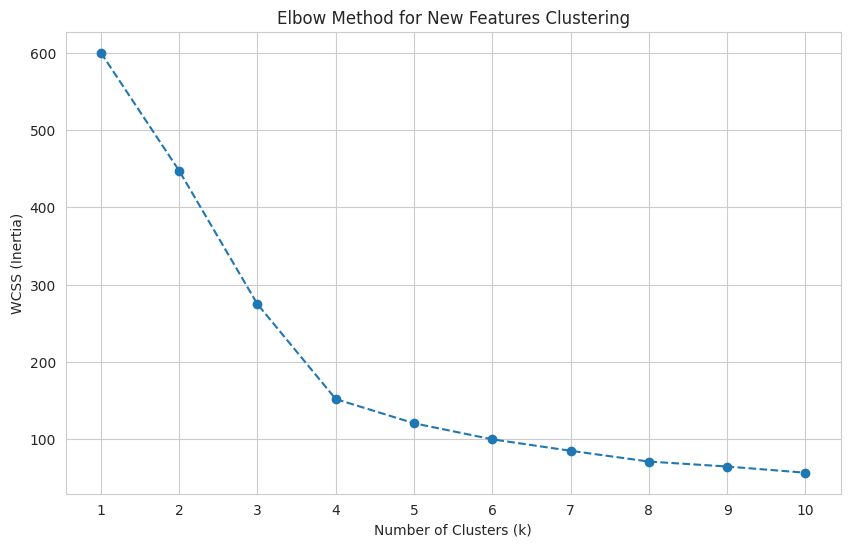

In [53]:
# Implement the Elbow Method for the new features
wcss3 = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X3_scaled)
    wcss3.append(kmeans.inertia_)

# Plot the Elbow Curve for the new features
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss3, marker='o', linestyle='--')
plt.title('Elbow Method for New Features Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.xticks(range(1, 11))
plt.show()

* Based on the Elbow Method plot which shows a clear bend at k=3, we can perform K-Means clustering with 3 clusters on the scaled data and assign the cluster labels back to the original dataframe.



In [54]:
# optimal number of clusters is k=3.
optimal_k = 3

kmeans_engineered = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
df['Engineered_Feature_Cluster'] = kmeans_engineered.fit_predict(X3_scaled)

print("DataFrame with new cluster assignments:")
display(df.head())

DataFrame with new cluster assignments:


,Gender,Age,Annual Income (k$),Spending Score (1-100),Income_Cluster,Age_Cluster,Income_to_Spending_Ratio,Age_x_Spending,Engineered_Feature_Cluster
0,Male,19,15,39,4,0,0.384615,741,0
1,Male,21,15,81,2,1,0.185185,1701,0
2,Female,20,16,6,4,0,2.666666,120,0
3,Female,23,16,77,2,1,0.207792,1771,0
4,Female,31,17,40,4,0,0.425000,1240,0


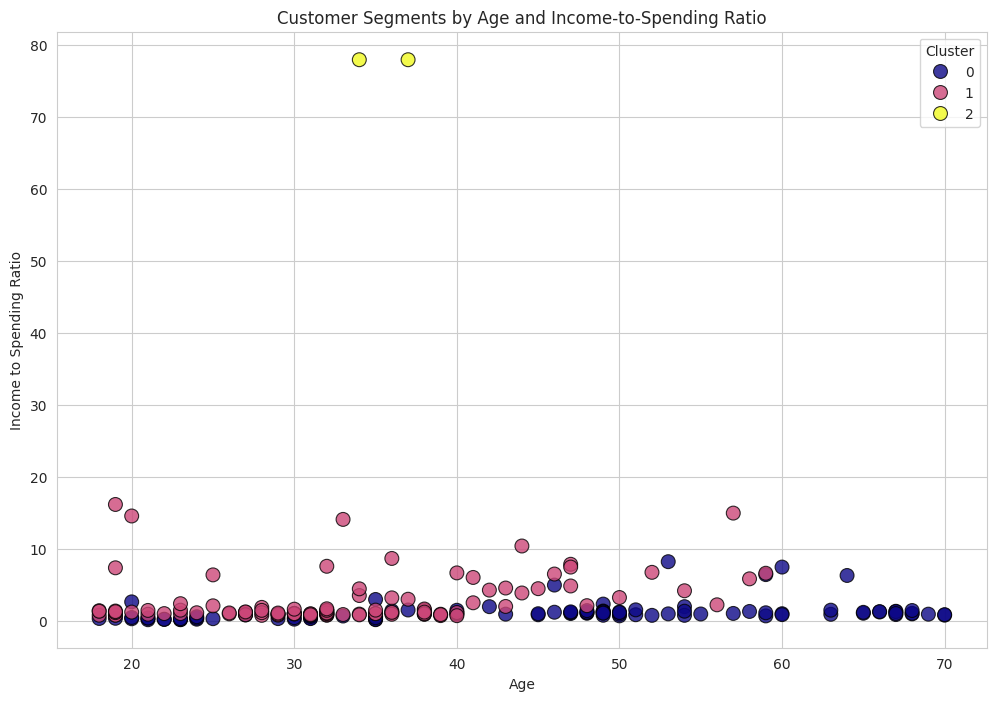

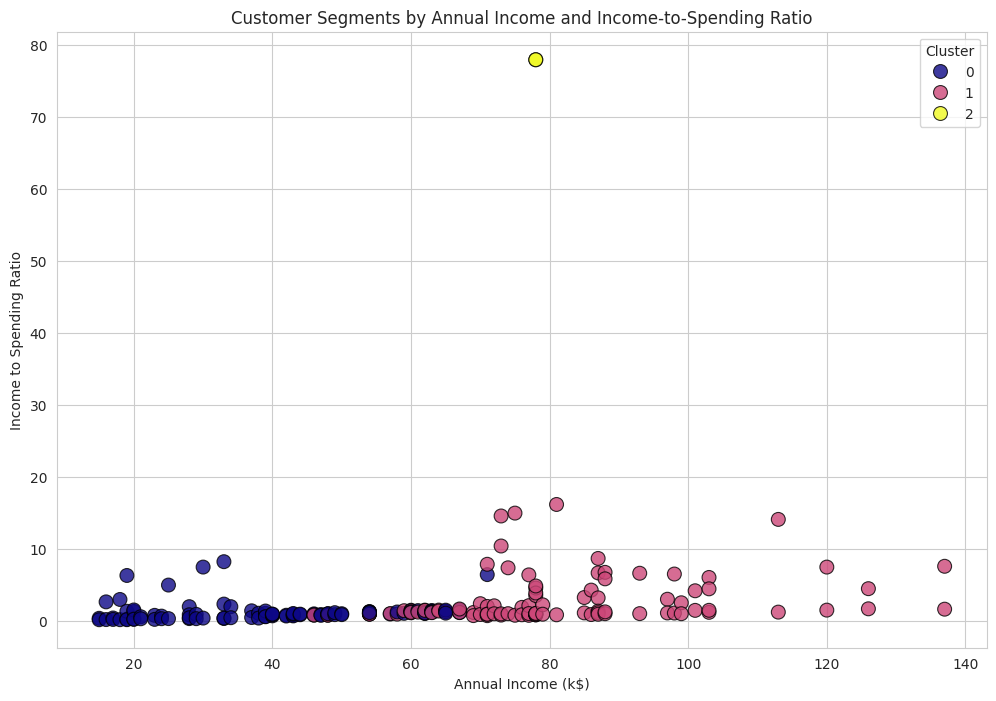


--- Engineered Feature Cluster Profiles ---


,Age,Annual Income (k$),Spending Score (1-100),Income_to_Spending_Ratio,Age_x_Spending,Size
Engineered_Feature_Cluster,,,,,,
0,44.28,40.73,49.23,1.25,2036.45,100
1,33.38,80.44,52.19,2.90,1661.71,98
2,35.50,78.00,1.00,78.00,35.50,2


In [55]:
# Visualize the engineered feature clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Age', y='Income_to_Spending_Ratio',
                hue='Engineered_Feature_Cluster', palette='plasma', s=100, alpha=0.8, edgecolor='black')
plt.title('Customer Segments by Age and Income-to-Spending Ratio')
plt.legend(title='Cluster')
plt.xlabel('Age')
plt.ylabel('Income to Spending Ratio')
plt.show()

plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Income_to_Spending_Ratio',
                hue='Engineered_Feature_Cluster', palette='plasma', s=100, alpha=0.8, edgecolor='black')
plt.title('Customer Segments by Annual Income and Income-to-Spending Ratio')
plt.legend(title='Cluster')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Income to Spending Ratio')
plt.show()

# Analyze the cluster profiles
cluster_profiles_engineered = df.groupby('Engineered_Feature_Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Income_to_Spending_Ratio', 'Age_x_Spending']].mean().round(2)
cluster_profiles_engineered['Size'] = df['Engineered_Feature_Cluster'].value_counts()

print("\n--- Engineered Feature Cluster Profiles ---")
display(cluster_profiles_engineered)